<div style="border: 2px solid #ccc; border-radius: 12px; padding: 20px; max-width: 950px; margin: auto; background-color: #1e1e1e; color: #f0f0f0; font-family: Arial, sans-serif; line-height: 1.6;">

  <div style="text-align: center; margin-bottom: 20px;">
    <img src="../image/coffee_production_by_subdivision.png" 
         alt="Coffee Production Boxplot by Subdivision"
         style="width: 80%; max-width: 100%; height: auto; border-radius: 8px; box-shadow: 0 0 10px rgba(0,0,0,0.4);">
  </div>

  <blockquote style="margin: 0; padding: 10px 20px; border-left: 4px solid #4faaff;">
    <p><strong>
      ""
    </strong></p>
    <p>
      — From Coffee Dataset: 
      <a href="../image/coffee_production_by_subdivision.png" target="_blank" style="color: #4faaff;">
        Coffee Producing Subdivsions - Brazil Region
      </a>
    </p>
  </blockquote>

</div>


# Analysis

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [8]:
# Import necessary libraries
from scipy.stats import pearsonr # correlation calculation
from scipy.stats import skew # skewness calculation
import pandas as pd # data manipulation using DataFrames
import numpy as np # numerical operations 

import seaborn as sns # data visualization 
import matplotlib.pyplot as plt # data visualization
import matplotlib.ticker as ticks # axis formatting
import plotly.express as px # interactive plots
import math # mathematical operations not found in numpy or native python...

In [9]:
# import coffee data
coffee = pd.read_csv("../data/crop/coffee_output.csv")
# import weather data
weather = pd.read_csv("../data/weather/weather_concat.csv")

In [10]:
# TODO: Merge these two dataframes together 
weather_merged = weather.merge(coffee, how='inner', left_on='year', right_on='year')


In [11]:
# TODO: View the first 5 rows of your data

weather_merged.head()


,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision_x,country,subdivision_y,type,60kgs_bag,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Minas Gerais,Arabica,16.3,581.0,5330.0,175.0,2298.0,2319.0,3320.0
1,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Espirito Santo,Arabica,2.2,581.0,5330.0,175.0,2298.0,2319.0,3320.0
2,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Espirito Santo,Robusta,6.2,581.0,5330.0,175.0,2298.0,2319.0,3320.0
3,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Sao Paulo,Arabica,3.3,581.0,5330.0,175.0,2298.0,2319.0,3320.0
4,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Parana,Arabica,1.8,581.0,5330.0,175.0,2298.0,2319.0,3320.0


In [12]:
# TODO: Check for null values 
weather_merged.isna().sum()


year                            0
rain_max                        0
temp_avg                        0
temp_max                        0
temp_min                        0
hum_max                         0
hum_min                         0
wind_max                        0
wind_avg                        0
subdivision_x                   0
country                         0
subdivision_y                   0
type                            0
60kgs_bag                       0
nonbearing_trees                5
bearing_trees                   5
nonbear_hectares                5
bearing_hectares                5
bearing_trees_per_hectare       5
nonbearing_trees_per_hectare    5
dtype: int64

In [13]:
# TODO: Drop rows that contain null values

weather_merged.dropna(inplace=True)

In [14]:
# TODO: Check for null values 
weather_merged.isna().sum()


year                            0
rain_max                        0
temp_avg                        0
temp_max                        0
temp_min                        0
hum_max                         0
hum_min                         0
wind_max                        0
wind_avg                        0
subdivision_x                   0
country                         0
subdivision_y                   0
type                            0
60kgs_bag                       0
nonbearing_trees                0
bearing_trees                   0
nonbear_hectares                0
bearing_hectares                0
bearing_trees_per_hectare       0
nonbearing_trees_per_hectare    0
dtype: int64

In [15]:
weather_merged.describe()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,60kgs_bag,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,2014.280899,3.083037,21.278090,28.181741,16.439684,96.389591,48.444761,8.482433,1.305804,9.204494,1008.876404,5790.337079,299.696629,2125.561798,2729.820225,3375.943820
std,5.176408,1.209247,0.540526,0.545556,0.888399,2.263560,3.040395,0.597430,0.381650,9.370037,281.292828,181.732192,87.692179,83.260401,164.404266,147.138027
min,2006.000000,1.617582,20.682400,27.000000,15.268681,87.837500,44.648352,7.484426,0.812202,0.800000,563.000000,5330.000000,175.000000,2010.000000,2319.000000,3030.000000
25%,2010.000000,2.183516,20.959536,27.769231,15.908791,96.060440,46.366120,7.898352,0.929144,2.700000,815.000000,5725.000000,234.000000,2060.000000,2662.000000,3281.000000
50%,2014.000000,2.876923,21.088660,28.406011,16.321311,97.049451,48.493750,8.549451,1.238874,4.800000,1050.000000,5760.000000,307.000000,2105.000000,2761.000000,3421.000000
75%,2019.000000,3.769231,21.444293,28.580769,16.475275,97.450549,49.329670,8.974176,1.557709,12.300000,1185.000000,5820.000000,347.000000,2175.000000,2792.000000,3483.000000
max,2023.000000,6.670968,23.040999,29.010989,18.753125,98.500000,57.806452,9.706452,2.075207,34.800000,1510.000000,6200.000000,475.000000,2298.000000,3020.000000,3578.000000


In [16]:
weather_merged.shape

(89, 20)

In [17]:
def interpret_skewness(skew_value) -> str:
    """
    Returns a label describing the skewness direction and strength.
    
    Args:
        skew_value (float): The skewness of the distribution.

    Returns:
        str: A label indicating the skew type.
    """
    if skew_value < -1:
        return "Strong Left Skew"
    elif -1 <= skew_value < -0.5:
        return "Moderate Left Skew"
    elif -0.5 <= skew_value <= 0.5:
        return "Approximately Symmetric"
    elif 0.5 < skew_value <= 1:
        return "Moderate Right Skew"
    else:
        return "Strong Right Skew"

In [18]:
# calculate specific skewness
skewness = round(weather_merged['60kgs_bag'].skew(), 2)

skew_label = interpret_skewness(1.35)
print(f"{skewness} is {skew_label}")


1.35 is Strong Right Skew


In [19]:
column = '60kgs_bag'
skew_value = skew(weather_merged[column])
label = interpret_skewness(skew_value)

print(f"Column: '{column}' → Skewness: {skew_value:.2f} → {label}")

Column: '60kgs_bag' → Skewness: 1.33 → Strong Right Skew


### Observations and Questions Gained from Descriptive Analysis of Coffee Producing Subdivisions:

**Observations**
- The average coffee production is approximately 9.2 million 60kg bags, with a maximum of nearly 35 million, indicating substantial variability.
- Temperature averages remain relatively stable across years (mean ~21.28°C), with low standard deviation—ideal for coffee cultivation.
- Wind speeds show a narrower range and lower averages, likely minimizing damage to crops.
- Max humidity tends to be consistently high (~96%), with less variation than min humidity, which might reflect daily extremes.
- Bearing trees vastly outnumber non-bearing trees, with a mean of 5,790 vs. 1,008, showing that most trees are productive.
- The trees per hectare are slightly more densely packed for non-bearing trees (~3375 trees/hectare) than for bearing ones (~2729 trees/hectare).

**Questions**
- Are subdivisions with higher bearing tree density per hectare more productive, or does overcrowding limit yield?
- Could lower wind_avg and wind_max be linked to increased disease (due to stagnant air and high humidity)?
- Does min humidity play a stronger role in reducing crop yield than average humidity, based on its variability?
- What role do non-bearing trees play in affecting average production metrics—are they due to age, disease, or replanting practices?

**Additional Notes:**
- The consistent humidity and temperature range support long-term coffee farming but may mask short-term shocks or microclimatic events.
- Further analysis could explore outlier years of high production—e.g., 35 million bags—cross-referenced with weather conditions and tree stats.
- There may be a threshold of bearing trees per hectare beyond which yield diminishes due to overcrowding or resource competition.

**Resources:**


([0, 1, 2, 3],
 [Text(0, 0, 'Minas Gerais'),
  Text(1, 0, 'Espirito Santo'),
  Text(2, 0, 'Sao Paulo'),
  Text(3, 0, 'Parana')])

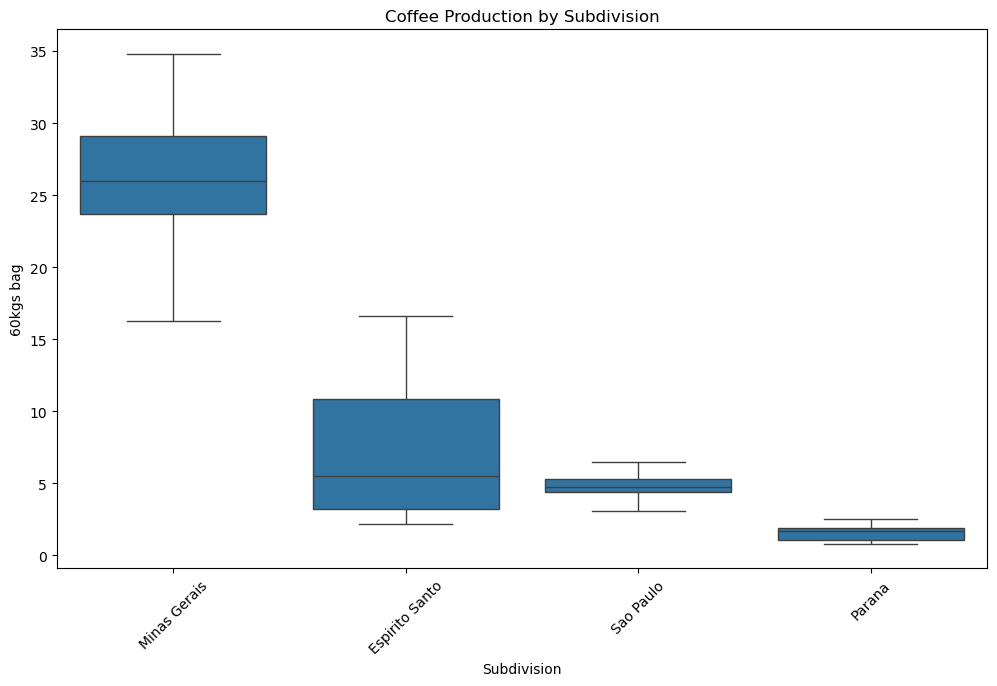

In [20]:
# TODO: BEGIN YOUR EDA!
# 60kgs bag Per Subdivision.
plt.figure(figsize=(12, 7))
sns.boxplot(data=weather_merged, x='subdivision_y', y='60kgs_bag')
plt.ylabel('60kgs bag')
plt.xlabel('Subdivision')
plt.title('Coffee Production by Subdivision')
plt.xticks(rotation=45)


### Observations and Questions gained from Box Plot of Subdivision:

**Observations**
- Minas Gerais exhibits the highest coffee production, with a higher median value and larger interquartile range (IQR) indicating both high output and variations over time.
- Espirito Santo shows more variability than Sao Paulo and Paraná, but much lower total production than Minas Gerais.
- Sao Paulo and Paraná have the lowest medians, with relatively tight IQRs, indicating stable and low production ouptus.
- Outliers are observed across all regions (especially Minas Gerais and Espirito Santo), indicating occasional years of abnormally high yields.

**Questions**
- What climatic or agricultural factors contribute to Minas Gerais' overall dominant production levels?
- An extension to this project could include assessing how Espirito Santo’s production can be optimized further to reduce volatility?
- Additionally, Why is Paraná’s production significantly lower? Is it due to land use, climate, or economic priorities? 

Additional Notes: 
- This visualization seems pretty useful as a high level overall look at various coffee producing subdivisions, as well as benchmarking regional performance.
- It may be insightful to overlay weather variables (e.g., rainfall, humidity) per subdivision in future iterations to explore other possible/causal patterns.
- Interestingly enough--given the time and resources--I can target subsidy, irrigation infrastructure, or pest management interventions where variability is high...

**Resources:**

In [21]:
# Create inteactive boxplt using plotly express
# Note: GitHub doesn't render plotyly, javaScript, or HTML type files.
# The image at the introduction of this Notebook is a static image of this interactive boxplot.
fig = px.box(
    data_frame=weather_merged,
    x='subdivision_y',
    y='60kgs_bag',
    color='subdivision_y',  # Optional: adds color by group
    title='Coffee Production by Subdivision (Interactive)',
    labels={'60kgs_bag': '60kg Bags', 'subdivision_y': 'Subdivisions'},
    width=900,
    height=600
)
# Customize the layout
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels
fig.show()

# Save the figure as a static image
fig.write_image("../image/coffee_production_by_subdivision.png")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, '2006'),
  Text(1, 0, '2007'),
  Text(2, 0, '2008'),
  Text(3, 0, '2009'),
  Text(4, 0, '2010'),
  Text(5, 0, '2011'),
  Text(6, 0, '2012'),
  Text(7, 0, '2013'),
  Text(8, 0, '2014'),
  Text(9, 0, '2015'),
  Text(10, 0, '2016'),
  Text(11, 0, '2017'),
  Text(12, 0, '2019'),
  Text(13, 0, '2020'),
  Text(14, 0, '2021'),
  Text(15, 0, '2022'),
  Text(16, 0, '2023')])

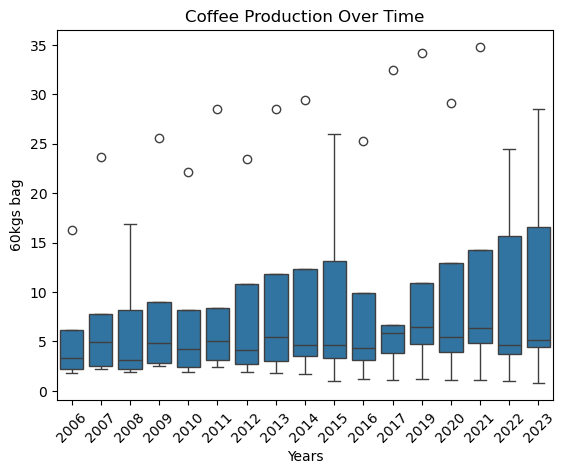

In [22]:
# 60kgs bag cofee production per Subdivision.
sns.boxplot(data=weather_merged, x='year', y='60kgs_bag')
plt.ylabel('60kgs bag')
plt.xlabel('Years')
plt.title('Coffee Production Over Time')
plt.xticks(rotation=45)


### Observations and Questions gained from boxplot of 60kgs Bag coffee production over time:

**Observations**
- Coffee production generally increased from 2006 to 2023, with the median yield rising steadily over time.
- Early years (2006–2011) show relatively stable production with tight interquartile ranges and few outliers.
- From 2012 onward, the boxes become taller, indicating increased variability in coffee output.
- 2017 shows a noticeable dip in median coffee production, followed by strong recovery in subsequent years.
- The period between 2018 and 2023 reveals a combination of growth and increased spread, meaning while production increased, outcomes were more diverse across regions or farms.
- Frequent outliers in several years suggest exceptional harvests or reporting anomalies—e.g., values significantly higher than typical for that year.

**Questions**
- What environmental or economic factors led to the production dip in 2017?
- Why did variability increase so sharply after 2018? Could this reflect differing regional outcomes, technology adoption, or climate effects?
- Are the frequent high outliers indicative of a small group of high-yield farms, or changes in reporting and measurement?

Additional Notes: 
- The steady upward trend in medians supports the notion of growing capacity or efficiency in coffee production, possibly linked to technology, better cultivation practices, or favorable climate conditions.
- The rising variability may call for further segmentation by region, variety, or environmental conditions to better understand performance drivers.
- This analysis could benefit from being cross-referenced with climate data (e.g., rainfall, temperature) to find deeper correlations.

**Resources:**

In [23]:
# Relationship between temp_avg and 60kgs_bag, eg. How strong is the relationship?
r_value, p_value = pearsonr(x=weather_merged['temp_avg'], y=weather_merged['60kgs_bag'])
print(f"Pearson correlation coefficient: {r_value:.2f}")
print(f"P-value: {p_value:.2f}")

Pearson correlation coefficient: -0.04
P-value: 0.71


### Observations and Questions gained from calculating Pearson Corellation Coefficient between Average Temperature and Coffee Production:

**Observations**
- The Pearson correlation coefficient between average temperature and coffee production is approximately -0.04, indicating virtually no linear relationship.
- The p-value of 0.71 shows this correlation is not statistically significant, suggesting any observed association is likely due to random chance.
- Despite expectations that temperature might influence crop yield, this result implies that other factors may play a more significant role in affecting production.

**Questions**
- Could other weather variables like humidity, rainfall, or wind patterns have a stronger effect on production?
- Is the relationship between temperature and coffee production nonlinear or affected by thresholds (e.g., extreme heat)?
- Would analyzing subsets of the data by climate phase (e.g., El Niño vs. La Niña years) reveal stronger relationships?

Additional Notes: 
- Exploring interaction effects or lagged impacts (e.g., previous year's temperature on this year’s yield) might yield more meaningful insights.
- Consider building a multivariate regression model or visualizing the relationship to test for nonlinear trends.

**Resources:**
- weather_merged coffee production metrics.

In [24]:
# Relationship between minimum humidity and 60kgs_bag, eg. How strong is the relationship?
r_value, p_value = pearsonr(x=weather_merged['hum_min'], y=weather_merged['60kgs_bag'])
print(f"Pearson correlation coefficient: {r_value:.2f}")
print(f"P-value: {p_value:.2f}")

Pearson correlation coefficient: -0.06
P-value: 0.55


### Observations and Questions gained from calculating Pearson Correlation Coefficient between Minimum Humidity and Coffee Production:

**Observations**
- The Pearson correlation coefficient is approximately -0.06, indicating a very weak negative linear relationship between minimum humidity and coffee production.
- The p-value is ~0.55, which is well above the common significance threshold (0.05), meaning the result is not statistically significant.
- This suggests that minimum humidity alone does not have a meaningful linear influence on production of 60kg coffee bags.

**Questions**
- Could maximum humidity or humidity range (difference between max and min) offer more predictive power?
- Is there a nonlinear or threshold-based relationship—e.g., production drops only when humidity falls below a certain point?
- Would combining humidity with temperature and rainfall as part of a multivariate analysis yield more insight?

Additional Notes: 
- Despite intuitive expectations (e.g., that drier air harms crops), the data suggests no clear direct effect of minimum humidity on coffee yields in this dataset.
- Exploring climate event overlays (e.g., drought years, high fungal outbreak years) to detect conditional effects.

**Resources:**
- weather_merged dataset
- scipy.stats.pearsonr for linear correlation

In [25]:
# Relationship between maximum rainfall and 60kgs bag yield, eg. How strong is the relationship?
r_value, p_value = pearsonr(x=weather_merged['rain_max'], y=weather_merged['60kgs_bag'])
print(f"Pearson correlation coefficient: {r_value:.2f}")
print(f"P-value: {p_value:.2f}")

Pearson correlation coefficient: -0.02
P-value: 0.82


### Observations and Questions gained from calculating Pearson Correlatoin Coefficient between Maximum Rainfall and 60kgs Bag yield:

**Observations**
- The Pearson correlation coefficient is -0.02, indicating an extremely weak negative linear relationship between maximum rainfall and coffee production.
- The p-value is 0.82, which is much higher than the typical 0.05 threshold — meaning the result is not statistically significant.
- This suggests that peak rainfall events have virtually no measurable effect on annual coffee yield in this dataset.

**Questions**
- Would other rainfall metrics — like monthly averages, cumulative rainfall, or rain distribution over time — show stronger relationships?
- Could extreme rainfall days, rather than just the maximum, cause localized damage or affect flowering stages?
- Is it possible that rainfall interacts with other factors (e.g., soil saturation, drainage quality, or humidity) in a way not captured here?

**Additional Notes:**
- This finding does not rule out the importance of rainfall, but it implies that using rain_max alone is insufficient as a predictive variable for coffee yield.
- In a tropical climate like Brazil’s — where high temperatures and variable rainfall are common — it's possible that irrigation systems or alternative watering practices are supplementing natural rainfall. This would reduce the direct impact of rain_max on coffee production.
- Further investigation is needed to understand the role of watering infrastructure, especially in high-production regions. Evaluating access to irrigation, water retention systems, and soil moisture levels could offer more accurate insight into how water availability truly affects yield.

**Resources:**

In [26]:
# Relationship between Maximum Wind Speed and 60kgs Bag yield, eg. How strong is the relationship?
r_value, p_value = pearsonr(x=weather_merged['wind_max'], y=weather_merged['60kgs_bag'])
print(f"Pearson correlation coefficient: {r_value:.2f}")
print(f"P-value: {p_value:.2f}")

Pearson correlation coefficient: -0.13
P-value: 0.22


### Observations and Questions gained from calculating Pearson Correlation Coefficient between Maximum Wind Speed and 60kgs Bags:

**Observations**
- The Pearson correlation coefficient is -0.13, suggesting a very weak negative linear relationship between maximum wind speed and coffee yield (measured in 60kg bags).
- The p-value (0.22) is greater than 0.05, meaning the result is not statistically significant, thus a claiming a real linear relationship exists based on this data cannot confidently be made.

**Questions**
- Could sudden wind bursts or storm events--rather than maximum values alone--be responsible for yield damage in certain years?
- Is wind interacting with other variables--like humidity or flowering timing--in ways that can't be captured by correlation alone?
- Might geographic factors play a stronger role than aggregate wind speed in affecting coffee production?

Additional Notes: 
- As with rainfall, a single variable like wind_max might not capture the full picture. Temporal patterns, frequency of strong winds, or plant vulnerability windows may be much better indicators.
- It would be great to evaluate seasonal wind patterns, or even using domain knowledge (e.g., flowering periods) to identify sensitive growth stages for deeper insights.

**Resources:**

In [27]:
# Relationship between Maximum Wind Speed and 60kgs Bag yield, eg. How strong is the relationship?
r_value, p_value = pearsonr(x=weather_merged['wind_avg'], y=weather_merged['60kgs_bag'])
print(f"Pearson correlation coefficient: {r_value:.2f}")
print(f"P-value: {p_value:.2f}")

Pearson correlation coefficient: -0.13
P-value: 0.21


### Observations and Questions gained from Pearson Correlation Coefficient between Average Temperature and 60kgs Bags:

**Observations**
- The Pearson correlation coefficient is -0.13, indicating a very weak negative relationship between average temperature and coffee production (in 60kg bags).
- The p-value is 0.21, which is greater than 0.05, so the correlation is not statistically significant, meaning the relationship is purely by chance. 

**Questions**
- Could extreme temperature values (outliers) be influencing the weak correlation?
- Would looking at temperature ranges or thresholds (e.g., days above 30°C) offer more insight than the average?
- How does temperature interact with other environmental variables like humidity or wind to impact yield?

**Additional Notes:**
- Consider visualizing the data with a scatter plot with temperature bins.
- Investigating non-linear relationships--quadratic or piecewise--could also be helpful if the effect of temperature is not linear.

**Resources:**

In [28]:
# Relationship between maximum humidity and 60kgs_bag, eg. How strong is the relationship?
r_value, p_value = pearsonr(x=weather_merged['hum_max'], y=weather_merged['60kgs_bag'])
print(f"Pearson correlation coefficient: {r_value:.2f}")
print(f"P-value: {p_value:.2f}")

Pearson correlation coefficient: 0.06
P-value: 0.58


### Observations and Questions gained from Pearson Correlation Coefficient between Maximum Humidity and 60kgs Bags:

**Observations**
- The Pearson correlation coefficient is 0.11, indicating a very weak positive linear relationship between maximum temperature and coffee production.
- The p-value is 0.32, which means the correlation is not statistically significant, meaniny, observed relationship may be due to chance.
- This would suggest maximum annual temperatures alone are not strong predictors of annual coffee yield.

**Questions**
- Could average temperature or number of extreme heat days show a stronger correlation??
- Does elevation, shade management, or irrigation buffer the effects of extreme temperatures in some subdivisions?

**Additional Notes:** 
- Visualizing scatterplots with a regression line and confidence interval may help to identify subtle patterns or interactions...

**Resources:**

In [29]:
# Relationship between Minimum Humidity and 60kgs_bag, eg. How strong is the relationship?
r_value, p_value = pearsonr(x=weather_merged['temp_min'], y=weather_merged['60kgs_bag'])
print(f"Pearson correlation coefficient: {r_value:.2f}")
print(f"P-value: {p_value:.2f}")

Pearson correlation coefficient: -0.08
P-value: 0.46


### Observations and Questions gained from Pearson Correlation Coefficient between Minimum Temperature and 60kgs Bags:

**Observations**
- The Pearson correlation coefficient is -0.08, indicating a very weak negative linear relationship between minimum temperature and coffee yield.
- The p-value is 0.46, which is above the 0.05 significance threshold — the result is not statistically significant.
- This suggests that minimum annual temperature alone is not a meaningful predictor of annual coffee production in this dataset.

**Questions**
- Could extreme low temperatures during flowering or fruit development stages have more impact than the annual minimum?
- Does minimum temperature affect yield differently across subdivisions depending on elevation or tree variety?
- Would analyzing daily temperature range (diurnal variation) provide better insights into plant stress conditions?

**Additional Notes:**
- Arabica coffee is sensitive to cold stress, but a single yearly temp_min value might not capture short-term cold snaps or critical thresholds.
- It may be helpful to explore frequency of days below 15°C, or model interaction effects between min temperature and humidity.
- Yield variations may also stem from agricultural practices, tree maturity, or subdivision-specific microclimates not reflected in this correlation.

**Resources:**

In [30]:
# Relationship between minimum humidity and 60kgs_bag, eg. How strong is the relationship?
r_value, p_value = pearsonr(x=weather_merged['temp_max'], y=weather_merged['60kgs_bag'])
print(f"Pearson correlation coefficient: {r_value:.2f}")
print(f"P-value: {p_value:.2f}")

Pearson correlation coefficient: 0.11
P-value: 0.32


In [31]:
# Relationship between minimum humidity and 60kgs_bag, eg. How strong is the relationship?
r_value, p_value = pearsonr(x=weather_merged['temp_max'], y=weather_merged['bearing_trees'])
print(f"Pearson correlation coefficient: {r_value:.2f}")
print(f"P-value: {p_value:.2f}")

Pearson correlation coefficient: 0.44
P-value: 0.00


In [32]:
weather_merged[['temp_avg', 'bearing_trees']].corr(method='pearson').style.background_gradient(cmap='coolwarm', axis=None)

,temp_avg,bearing_trees
temp_avg,1.000000,-0.427402
bearing_trees,-0.427402,1.000000


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

What is the relationship between temp_avg and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

- The Pearson correlation coefficient between average temperature and coffee production is approximately -0.04, indicating virtually no linear relationship. The p-value of 0.71 shows this correlation is not statistically significant, suggesting any observed association is likely due to random chance. Despite my expectations that temperature might influence crop yield, this result implies that other factors may play a more significant role in affecting production.

What is the relationship between minimum humidity and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

- The Pearson correlation coefficient is approximately -0.06, indicating a very weak negative linear relationship between minimum humidity and coffee production. The p-value is ~0.55, which is well above the common significance threshold (0.05), meaning the result is not statistically significant. This suggests that minimum humidity alone does not have a meaningful linear influence on production of 60kg coffee bags.

What is the relationship between rain_max and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

- The Pearson correlation coefficient is -0.02, indicating an extremely weak negative linear relationship between maximum rainfall and coffee production. The p-value is 0.82, which is much higher than the typical 0.05 threshold — meaning the result is not statistically significant. This suggests that peak rainfall events have virtually no measurable effect on annual coffee yield in this dataset.


What is the relationship between average wind speed and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

- The Pearson Correlation Coefficient is -0.13, indicating a very weak negative relationship between average temperature and coffee production (in 60kg bags). The p-value is 0.21, which is greater than 0.05, so the correlation is not statistically significant, meaning the relationship is purely by chance. 

Perform the same bivariate analysis between the mentioned weather columns (temp_avg, hum_min, rain_max, and wind_avg) and a coffee-related column of your choice (bearing_trees, nonbearing_trees, bearing_trees_per_hectare, etc). Which directions do these relationships follow? What are the strengths of these relationships?

- The Pearson correlation coefficient is -0.08, indicating a very weak negative linear relationship between minimum temperature and coffee yield. The p-value is 0.46, which is above the 0.05 significance threshold — the result is not statistically significant. This suggests that minimum annual temperature alone is not a meaningful predictor of annual coffee production.


Which weather factor seems to influence coffee production the most? 

- I based on the EDA I've done so far, bearing hectares, wind max, and max temp have the most impact on production. This aligns with the overall notion of farming. High winds help with insects, germs, etc... 

Which data would you collect to continue exploring the impacts of weather and economic forces on coffee production?

- There are a number of weather and environmental data, like droup condition readings, watering data, atmoshperic pressure data, metadata readings, and monthly or daily readings of the existing dataset as well as those mentioned. 

If you were preparing a report to provide coffee farmers, which weather condititions would you state are the most favorable for coffee growing (assuming any exist)?

- Based on Statistical analysis/EDA done on various weather conditions and coffee production data, such as bearing hectares, million per bags of coffee produced, etc. The insights gained from this endeavor, showed that bearing hectares or field size, high winds, and relatively high temperatures have the most impact on coffee production. 